# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [1]:
import numpy as np
import pandas as pd
import requests
import requests_cache
import lxml.html as lx

requests_cache.install_cache("mycache")

In [2]:
def article_links(url):
    '''
    Input: url, a string
    Output: a list of url, a list of strings. 
    The function takes in an URL of the article list and return a list of article URLs from the given URL
    Print the corresponding error message and return nothing if unusual situation occurs
    '''
    
    # For invalid URLs, print the error message and return nothing
    try:
        response = requests.get(url)
    except:
        print("Invalid URL")
        return None
    
    response.raise_for_status()
        
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)

    # Extract all the 'href' attributes under tags 'a' that contain the string 'article'
    # Store them to a set for unique elements
    # convert the set to a list and return it
    result = list(set(x.attrib["href"] for x in html.xpath("//a[contains(@href, 'article')]")))
    return result

In [3]:
# 'BIZ+Tech' list
biz_urls = article_links("https://www.sfchronicle.com/business/")
biz_urls[:5]

['https://www.sfchronicle.com/business/article/Lime-dropped-the-bike-from-its-name-now-13621057.php',
 'https://www.sfchronicle.com/business/article/Ship-traffic-February-19-13620545.php',
 'https://www.sfchronicle.com/business/article/Former-Apple-compliance-lawyer-charged-with-13614730.php',
 'https://www.sfchronicle.com/realestate/article/Two-bedroom-Craftsman-bungalow-open-Sunday-in-13620505.php',
 'https://www.sfchronicle.com/business/article/Lip-syncing-rules-the-world-but-Smule-hopes-its-13621486.php']

In [4]:
# 'local' list
local_urls= article_links("https://www.sfchronicle.com/local/")
local_urls[:5]

['https://www.sfchronicle.com/bayarea/heatherknight/article/SF-s-homeless-reconnect-with-family-with-help-13600080.php',
 'https://www.sfchronicle.com/bayarea/article/As-workers-and-students-struggle-food-banks-are-13458905.php',
 'https://www.sfchronicle.com/bayarea/article/Season-of-Sharing-Receiving-help-after-13417681.php',
 'https://www.sfchronicle.com/crime/article/San-Mateo-homeowner-detains-auto-burglar-after-13618326.php',
 'https://www.sfchronicle.com/bayarea/heatherknight/article/Insured-SF-General-patients-on-the-hook-for-13579459.php']

In [5]:
# 'FOOD' list
food_urls = article_links("https://www.sfchronicle.com/food/")
food_urls[:5]

['https://www.sfchronicle.com/recipes/article/A-Brown-Kitchen-Citrus-and-apples-enrich-a-13527127.php',
 'https://www.sfchronicle.com/recipes/article/A-Brown-Kitchen-A-thousand-stories-in-a-pot-of-13574169.php',
 'https://www.sfchronicle.com/recipes/article/Repertoire-Slow-Roasted-Salmon-Salad-12966037.php',
 'https://www.sfchronicle.com/restaurants/article/When-a-neighborhood-bar-is-really-a-home-13537003.php',
 'https://www.sfchronicle.com/restaurants/article/The-best-meals-under-20-on-24th-Street-in-the-12256056.php']

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [6]:
 def article_data(url):   
    '''
    Input: URL, a string
    Output: data extracted from the article, a dictionary
    The functon takes a URL link and return the url, title, text, author, date, date_updated in a dictionary
    '''
    
    # For invalid url, print the error message and return nothing
    try: 
        response = requests.get(url)
    except:
        print("Invalid URL")
        return None
    
    response.raise_for_status()

    
    html = lx.fromstring(response.text)
    
    ###########################################################
    # title: two different nodes possible
    # node1: //body//article/header//h1/text()
    # node2: //div[@class = 'article-head']//h2/text()
    ###########################################################
    title = html.xpath("string(//body//article/header//h1/text() | //div[@class = 'article-head']//h2/text())")
    
    ###########################################################
    # text: three different nodes possible
    # node1: //article//section[@class='body']/p//text()
    # node2: //div[@class='article-body']/p//text()
    # node3: //div[@class='article_text']/p//text()
    # join the returned list as a string
    ###########################################################
    text = " ".join(html.xpath("//article//section[@class='body']/p//text() | //div[@class='article-body']/p//text() | //div[@class='article-text']/p//text()"))
    
    ############################################################
    # author: three different nodes possible
    # node1 : //span[@class = 'header-authors-name']
    # node2 : //span[@class = 'header-byline']
    # node3 : //p[@class = 'byline']//a[contains(@href, 'author')]
    # assign None if the value is missing
    ############################################################
    result = html.xpath( "//span[@class = 'header-authors-name'] | //span[@class = 'header-byline'] | //p[@class = 'byline']//a[contains(@href, 'author')]")
    if len(result) > 0 and result[0].text_content().strip():
        author = result[0].text_content().strip().strip("By")
    else:
        author = None
    
    ############################################################
    # published date; three different nodes possible
    # node1: //time[@itemprop = 'datePublished']/@datetime
    # node2: //span[@class = 'datestamp']//time/@datetime
    # node3: //meta[@itemprop = 'datePublished']/@content)
    ###########################################################
    date = html.xpath("string(//time[@itemprop = 'datePublished']/@datetime | //span[@class = 'datestamp']//time/@datetime | //meta[@itemprop = 'datePublished']/@content)")
    
    ###########################################################
    # updated date: two different nodes possible
    # node1: //time[@itemprop = 'dateModified']/@datetime
    # node2: //meta[@itemprop = 'dateModified']/@content
    # assign None if the updated date is missing
    ###########################################################
    date_updated_search = html.xpath("string(//time[@itemprop = 'dateModified']/@datetime | //meta[@itemprop = 'dateModified']/@content)")
    date_updated = date_updated_search if date_updated_search else None
    
    return {'url': url, 'title': title, 'text': text, 'author': author, 'date': date, 'date_updated': date_updated}

In [28]:
# Test it on the article in the example
article_data("https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php")

{'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00',
 'text': 'The book “Gardenlust: A Botanical Tour of the World’s Best New Gardens” by Christopher Woods (Timber Press, 416 pages, $40) shows you gardens from around the globe, including some surprising places such as Oman, Singapore and the island of Nevis in the West Indies, all of them created in the past 20 years. Fifty gardens or designers are featured. The sites are all engaging; some are breathtaking. Woods, the author and major photographer of the book, began his career as a gardener at Kew Gardens in London. He then worked at a number of public gardens in England and the U.S., including 20 years as director and chief designer of Chanticleer Arboretum in Pennsylvania. (I have been to Chanticleer and have seen the Ruins Garden he created there from the stone and slate ruins of the home of the original owner of the property. It’s a spectacular piece of garden art, which incl

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
# Use the function on the three categories: Biz+Tech, Local, Food
biz_df = pd.DataFrame(article_data(link) for link in biz_urls)

# display the first five rows for each dataframe
biz_df.head(5)

,author,date,date_updated,text,title,url
0,Melia Russell,2019-02-16T01:00:00+00:00,None,As it faces competition from more focused tran...,Lime dropped the ‘bike’ from its name; now the...,https://www.sfchronicle.com/business/article/L...
1,San Francisco Marine Exchange,2019-02-15T21:21:38+00:00,None,Ship traffic Due to arrive today Due to depart...,"Ship traffic, February 19",https://www.sfchronicle.com/business/article/S...
2,Daisuke Wakabayashi,2019-02-13T23:15:41+00:00,None,A former senior lawyer at Apple who oversaw th...,Former Apple compliance lawyer charged with in...,https://www.sfchronicle.com/business/article/F...
3,None,2019-02-15T21:10:34+00:00,None,"Exquisite woodwork, a level-out deck and a pri...",Two-bedroom Craftsman bungalow open Sunday in ...,https://www.sfchronicle.com/realestate/article...
4,Sophia Kunthara,2019-02-17T12:00:00+00:00,2019-02-17T12:00:35+00:00,"A decade into making musical performance apps,...","Lip-syncing rules the world, but Smule hopes i...",https://www.sfchronicle.com/business/article/L...


In [9]:
food_df = pd.DataFrame(article_data(link) for link in food_urls)
food_df.head(5)

,author,date,date_updated,text,title,url
0,Nik Sharma,2019-01-11T20:05:52+00:00,2019-01-11T21:51:26+00:00,Since I usually drink ice-loaded glasses of sw...,A Brown Kitchen: Citrus and apples enrich a wi...,https://www.sfchronicle.com/recipes/article/A-...
1,Nik Sharma,2019-02-01T19:06:18+00:00,2019-02-01T19:07:47+00:00,Stock recipes are personal. A stock in many wa...,A Brown Kitchen: A thousand stories in a pot o...,https://www.sfchronicle.com/recipes/article/A-...
2,Jessica Battilana,2018-06-04T17:17:21+00:00,2018-06-04T18:58:08+00:00,I spent a few days in Seattle earlier this mon...,Repertoire: A salad for your summer salmon days,https://www.sfchronicle.com/recipes/article/Re...
3,Esther Moble,2019-01-16T20:00:00+00:00,2019-01-16T21:07:18+00:00,Some old bars are notable because they have a ...,O’Keeffe’s in the Richmond a neighborhood bar ...,https://www.sfchronicle.com/restaurants/articl...
4,Sarah Fritsche,2017-10-05T18:57:26+00:00,2017-10-05T19:20:26+00:00,Welcome to the 2017 edition of Bargain Chro...,The best meals under $20 on 24th Street in the...,https://www.sfchronicle.com/restaurants/articl...


In [10]:
local_df = pd.DataFrame(article_data(link) for link in local_urls)
local_df.head(5)

,author,date,date_updated,text,title,url
0,Heather Knight,2019-02-08T12:00:00+00:00,2019-02-09T04:37:15+00:00,There are obvious questions when San Francisca...,SF’s homeless reconnect with family with help ...,https://www.sfchronicle.com/bayarea/heatherkni...
1,Jill Tucker,2018-12-12T00:47:11+00:00,2018-12-12T01:26:24+00:00,Amid the millionaires and billionaires of Sili...,"As workers and students struggle, food banks a...",https://www.sfchronicle.com/bayarea/article/As...
2,Steve Rubenstein,2018-11-26T17:30:08+00:00,2018-12-18T20:23:13+00:00,"Year after year, Patti Medina answered the pho...",Season of Sharing: Help after daughter’s illne...,https://www.sfchronicle.com/bayarea/article/Se...
3,Lauren Hernández,2019-02-16T02:39:59+00:00,2019-02-16T02:41:36+00:00,A San Mateo homeowner watched an auto burglar ...,San Mateo homeowner detains auto burglary susp...,https://www.sfchronicle.com/crime/article/San-...
4,Heather Knight,2019-02-01T12:00:00+00:00,2019-02-01T20:58:05+00:00,An excruciating pain jolted Zander Brandt awak...,Insured SF General patients on the hook for pe...,https://www.sfchronicle.com/bayarea/heatherkni...


In [11]:
# Create the column 'category' and merge the three data frames
biz_df["category"] = "Biz+Tech"
local_df["category"] = "local"
food_df["category"] = "food"

article_df = pd.concat([biz_df, local_df, food_df], ignore_index = True)

# regularize the author column
# remove "Associated Press" at the end and separate the two authors' names by ','
article_df["author"] = article_df["author"].str.replace(", Associated Press","").str.replace("and", ",")

# Convert all dates to datetime objects
article_df["date"] = pd.to_datetime(article_df["date"])
article_df["date_updated"] = pd.to_datetime(article_df["date_updated"])

In [12]:
# check if any row misses any values of title, text, published date
(article_df[["title","text","date"]].applymap(lambda x: x =="" or x is None)).any()

title    False
text     False
date     False
dtype: bool

In [13]:
# check the type of each column
article_df.dtypes

author                  object
date            datetime64[ns]
date_updated    datetime64[ns]
text                    object
title                   object
url                     object
category                object
dtype: object

In [14]:
# display the first 15 rows
article_df.head(15)

,author,date,date_updated,text,title,url,category
0,Melia Russell,2019-02-16 01:00:00,NaT,As it faces competition from more focused tran...,Lime dropped the ‘bike’ from its name; now the...,https://www.sfchronicle.com/business/article/L...,Biz+Tech
1,San Francisco Marine Exchange,2019-02-15 21:21:38,NaT,Ship traffic Due to arrive today Due to depart...,"Ship traffic, February 19",https://www.sfchronicle.com/business/article/S...,Biz+Tech
2,Daisuke Wakabayashi,2019-02-13 23:15:41,NaT,A former senior lawyer at Apple who oversaw th...,Former Apple compliance lawyer charged with in...,https://www.sfchronicle.com/business/article/F...,Biz+Tech
3,None,2019-02-15 21:10:34,NaT,"Exquisite woodwork, a level-out deck and a pri...",Two-bedroom Craftsman bungalow open Sunday in ...,https://www.sfchronicle.com/realestate/article...,Biz+Tech
4,Sophia Kunthara,2019-02-17 12:00:00,2019-02-17 12:00:35,"A decade into making musical performance apps,...","Lip-syncing rules the world, but Smule hopes i...",https://www.sfchronicle.com/business/article/L...,Biz+Tech
5,ANNABELLE LIANG,2019-02-18 03:31:32,2019-02-18 03:34:21,SINGAPORE (AP) — Asian markets were broadly hi...,Asian stocks rally on hope of further China-US...,https://www.sfchronicle.com/news/world/article...,Biz+Tech
6,Don Thompson,2019-02-14 22:43:14,NaT,SACRAMENTO — Gov. Gavin Newsom set off a flurr...,Newsom wants users to profit from online data,https://www.sfchronicle.com/business/article/N...,Biz+Tech
7,"Kelvin Chan , Rob Gillies",2019-02-13 23:20:57,NaT,TORONTO — Canada’s national game — brought to ...,Huawei makes global marketing push amid diplom...,https://www.sfchronicle.com/business/article/H...,Biz+Tech
8,Carl Nolte,2019-02-16 18:00:00,2019-02-17 05:48:03,These are sad days along San Francisco’s hip V...,Lucca Ravioli’s closure marks another farewell...,https://www.sfchronicle.com/bayarea/nativeson/...,Biz+Tech
9,Kathleen Pender,2019-02-16 12:00:00,2019-02-17 05:47:29,Readers had several questions about my recent ...,Answers to readers’ tax questions on college s...,https://www.sfchronicle.com/business/networth/...,Biz+Tech


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [15]:
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.pyplot as plt

In [16]:
# Join the texts of the articles in each category
biz_corpus =" ".join(article_df[article_df["category"] == "Biz+Tech"]["text"])
food_corpus = " ".join(article_df[article_df["category"] == "food"]["text"])
local_corpus = " ".join(article_df[article_df["category"] == "local"]["text"])

In [17]:
# Define Stopwords
stop_words = stopwords.words('english') + ["say", "also", "too", "get", "have", "make", "may", "might", "would", "could", "go", "still", "one", "two" ,"year", "month", "day"]

lemmatizer = nltk.WordNetLemmatizer()

def wordnet_pos(tag):
    """
    Map a Brown POS tag to a WordNet POS tag.
    """
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)


def get_freq_dist(doc):
    '''
    The function takes a text string and return the frequencey distribution of the meaningful words in the text. 
    '''
    # Collect the words in lower case and lemmatize the words.
    # Filter the non-alphabetical words and the stop words out.
    words = [w.lower() for w in nltk.word_tokenize(doc)]
    words_tags = nltk.pos_tag(words)
    words = (lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in words_tags)
    words = (w for w in words if w not in stop_words and w.isalpha())
    
    return nltk.FreqDist(words)

In [18]:
# Get the frequency distributions of the three categories
biz_feq = get_freq_dist(biz_corpus)
food_feq = get_freq_dist(food_corpus)
local_feq = get_freq_dist(local_corpus)

In [20]:
%%capture

# Customize the titles and axis of the plots

# Create the Figure and plot.
fig_food = plt.figure(figsize = (10, 4))
food_feq.plot(50)

# Get the Axes object from the Figure.
ax1 = fig_food.get_axes()[0]

# Customize as with any other matplotlib Axes
ax1.set_title("Word Frequencies for Food Category")
ax1.set_xlabel("Words")


# do the same for biz+tech
fig_biz = plt.figure(figsize = (10, 4))
biz_feq.plot(50)
ax2 = fig_biz.get_axes()[0]
ax2.set_title("Word Frequencies for Biz+Tech Category")
ax2.set_xlabel("Words")


# and for local
fig_local = plt.figure(figsize = (10, 4))
local_feq.plot(50)
ax3 = fig_local.get_axes()[0]
ax3.set_title("Word Frequencies for Local Category")
ax3.set_xlabel("Words")

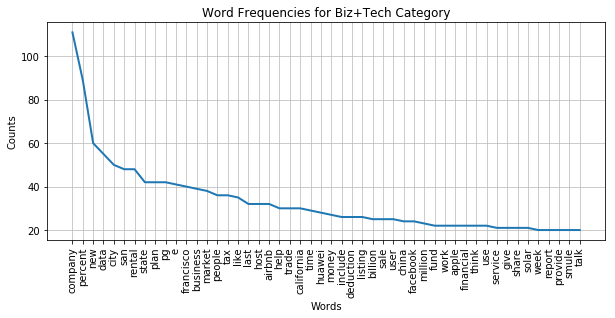

In [21]:
# word frequency plot for biz+tech
fig_biz

__Interpretation__: For the `Biz+Tech` category, words that are related to career, business, and technology show up frequently (as one can expect). The word 'company' is mentioned the most. The city San Francisco, the state California, and the country China are mentioned often in the articles. The companies 'Airbnb', 'Huawei', 'Facebook', 'Apple', and 'Smule' are popular words. Words related to IT such as 'data' and 'user' are on the list as well. In addition, business related terms such as 'rental', 'percent', 'tax', and 'market' also show up at a high frequency.  

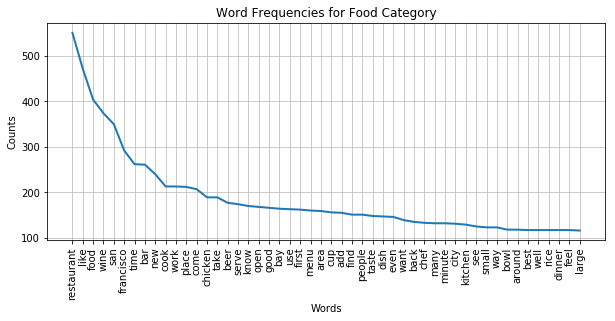

In [22]:
# word frequency plot for food
fig_food

__Interpretation__: For the `Food` category, words pertaining to culinary show up frequently. 'Restaurant' and 'bar' are mentioned very often, which suggests that the recent articles often discuss restaurants and bars. Culinary-adjacent words such as 'food', 'wine', 'chicken', 'beer', and 'fruit' are also frequently mentioned. One interesting thing I noticed is that the counts for the frequent words are much higher than in the `Biz+Tech` category. This may suggest that the topics in food articles overlap more. 

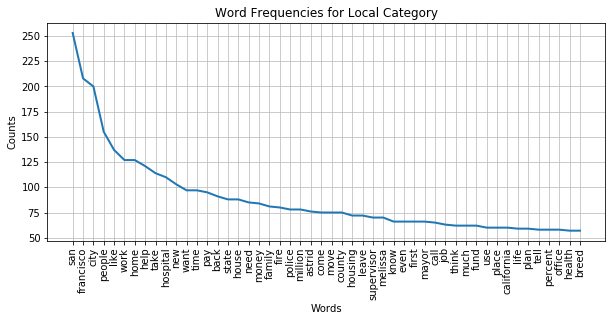

In [23]:
# word frequency plot for local
fig_local

__Interpretation__: For the `Local` category, words such as 'people', 'home', 'work', 'hospital', 'house', 'fire', and 'police' show up often. These words may be related to citizens' lives, city events, news, and policies. The city San Francisco and the word 'city' itself show up often, but this is not surprising given that this is the `San Francisco Chronicle`. 

__Long hapaxes nouns in the articles__:  

It might also be helpful to look at long nouns that show up only once in the articles. Nouns usually can indicate the topic of the articles efficiently. It is less likely for long nouns to be used in the article if it does not pertain to the theme. Therefore, I list the long hapaxes nouns for each category to infer the topics of recent articles. 

In [24]:
def long_nouns(feqdist):
    '''
    Input: a frequency distribution
    Output: A list of long nouns
    The function returns long nouns (>10 characters) from the given frequency distribution
    '''
    hapaxes = feqdist.hapaxes()
    word_tags = nltk.pos_tag(hapaxes)
    nouns = [word for word, tags in word_tags if (tags == 'NN') and len(word) > 10]
    return nouns

In [25]:
# Long nouns in 'Biz+Tech'
biz_long_nouns = long_nouns(biz_feq)
print(biz_long_nouns)

['availability', 'headquarter', 'understanding', 'investigation', 'termination', 'responsibility', 'subscription', 'participatory', 'sophiakunthara', 'continuation', 'speculation', 'misconception', 'homelessness', 'retaliation', 'telecommunication', 'relationship', 'collaboration', 'presentation', 'supervision', 'cybersecurity', 'dovetailing', 'surveillance', 'stockbroker', 'proprietorship', 'spokeswoman', 'credibility', 'stakeholder', 'stockholder', 'sectionalization', 'consequence', 'commissioner', 'improvement', 'surveymonkey', 'christopher', 'tripadvisor', 'concentration', 'concentrate', 'methodology', 'replacement', 'exploitation', 'organization', 'deportation', 'immigration', 'deletefacebook', 'preparation', 'deliberation', 'frustration', 'possibility', 'hopefulness', 'cryptocurrency', 'restructure', 'manufacturer', 'denominator', 'construction', 'interaction', 'anishinaabe', 'advancement', 'depersonalize', 'disintegrate', 'photography', 'communicate']


__Interpretation__: The words 'stakeholder', 'stockholder', and 'stockbroker' should be related to the stock market. The words 'retaliation' and 'telecommunication' combined with the word 'Huawei' as found in the line plot could be hinting at the conflicts between the US and the Chinese company 'Huawei'. Words like 'homelessness', 'deportation', and 'immigration' might be talking about recent policy developments pertaining to border security. Words such as 'cybersecurity', 'cryptocurrency', and 'telecommunication' are likely about information technology. 

In [26]:
# Long nouns in 'food_feq'
food_long_nouns = long_nouns(food_feq)
print(food_long_nouns)

['transmission', 'philosopher', 'advertisement', 'commemorate', 'catastrophe', 'executioner', 'stockpiling', 'degradation', 'sustainability', 'microscopic', 'disintegrate', 'chlorophyll', 'enhancement', 'triangulation', 'orchestrate', 'contradictory', 'transparent', 'latticework', 'investigation', 'singularity', 'sfchronicle', 'earnestness', 'artisanship', 'compilation', 'thoughtfulness', 'viennoiserie', 'approximate', 'encyclopedia', 'consultation', 'andreamarie', 'mindfulness', 'ramikrishnan', 'inquisition', 'interchange', 'wheelbarrow', 'affirmation', 'schramsbergs', 'publication', 'oversaturation', 'aukcarapasutanun', 'biotechnology', 'optometrist', 'inevitability', 'incongruity', 'raimbauderie', 'weissburgunder', 'hibernation', 'philanthropist', 'discriminate', 'sociologist', 'anachronism', 'manufacturer', 'saltyseattle', 'industriousness', 'renaissance', 'rectangular', 'persnickety', 'reconnaissance', 'certification', 'proclamation', 'righteousness', 'modification', 'contemplatio

__Interpretation__: The words 'drinkability', 'cellarmaker', 'weissburgunder', and 'scharffenberger' are likely related to the common word 'wine' we found in the line plot. Wine and winery might be a topic discussed lately.

In [27]:
# Long nouns in 'local'
local_long_nouns = long_nouns(local_feq)
print(local_long_nouns)

['reunification', 'millionaire', 'billionaire', 'paraphernalia', 'prohibition', 'proliferation', 'hallucination', 'respiratory', 'antianxiety', 'reinforcement', 'partnership', 'transaction', 'appreciation', 'foreclosure', 'hankschulman', 'fingerprint', 'paratransit', 'headquarters', 'distraction', 'parishioner', 'thoroughfare', 'citizenship', 'conditioner', 'shipbuilder', 'authenticate', 'performance', 'misunderstand', 'insinuation', 'containment', 'relentlessness', 'recognition', 'indifference', 'nourishment', 'sharecropper', 'desperation', 'ventilation', 'displacement', 'consideration', 'involvement', 'reinvestment', 'postponement', 'elimination', 'preschooler', 'destination', 'declaration', 'sensibility', 'modification', 'credibility', 'destabilize', 'sophiakunthara', 'accommodate', 'restoration', 'preservation', 'cancellation', 'preparation', 'observation', 'marketplace', 'cannapreneur', 'bachelorette', 'transmission', 'supermajority', 'dominicfracassa', 'affordability', 'quarterba

__Interpretation__: The words 'incarceration', 'accountability', 'fingerprint', and 'investigate' might be hinting about some crime or accident. 'cancellation', 'feasibility', 'prohibition', 'administrator', and 'supermajority' could be about some policies. 'enterocolitis', 'postsurgery', and 'prescription' may be related to the word 'hospital' we found in the line plot.

__Summary__:  

* Biz+Tech: 
For the `Biz+Tech` category, it seems that the articles are often related to tech companies, market, trading, stock, sales and information technology. These terms could be seen in the line plot of the top 50 popular words, and they could also be confirmed by the long nouns detected within the articles.

* Food:
For the `Food` category, it seems that the popular topics are food services (restaurants, bars, chef), products (wine, beer, chicken), and food recipes. Like before, these terms could be seen in the line plot of top 50 popular words.

* Local:
For the `Local` category, the articles likely focus on the events or policies occured within the city. Topics like work, hospital, crime and housing show up frequently. These topics could also be suggested by long nouns found such as 'incarceration', 'foreclosure', and 'citizenship'. 

Details for each category could be found in the cells above. 

For all three categories, the words 'San Francisco' and 'California' show up frequently. This is expected since the news website is mainly about the news related to San Francisco. Besides this, the three categories have little overlap. The long nouns we found recapitulate this lack of overlap. The frequent words embody the characteristics of the three categories. The categories do differentiate the topics of the articles. One interesting finding is that the articles in `Food` categories seemingly share more similar topics. 